# Hierarchical Indexing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv("titanic.csv")
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


### When we group a data, the column by which the data is grouped becomes the index

In [4]:
titanic.index

RangeIndex(start=0, stop=1309, step=1)

In [6]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [20]:
titanic["age"] = titanic["age"].replace(["?"],np.nan).astype(float)
titanic["fare"] = titanic["fare"].replace(["?"],np.nan).astype(float)

In [24]:
s1 = titanic.groupby('pclass')["age"].mean()
s1

pclass
1    39.159918
2    29.506705
3    24.816367
Name: age, dtype: float64

In [25]:
s1.index

Int64Index([1, 2, 3], dtype='int64', name='pclass')

### If we group data by multiple columns, then those columns becomes the index i.e multiple indexing

In [27]:
s2 = titanic.groupby(["pclass","sex"])["age"].mean()
s2

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

In [28]:
s2.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

### Performing numeric function on an dataframe

In [34]:
s3 = titanic.groupby(["pclass","sex"]).mean()
s3

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2148\937534048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s3 = titanic.groupby(["pclass","sex"]).mean()


survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [32]:
s3.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

### Using .sort_index() to do the same thing i.e creating multiple indexes.

In [33]:
titanic.set_index(["pclass","age"])

survived                                             name  \
pclass age                                                                  
1      29.0000         1                    Allen, Miss. Elisabeth Walton   
       0.9167          1                   Allison, Master. Hudson Trevor   
       2.0000          0                     Allison, Miss. Helen Loraine   
       30.0000         0             Allison, Mr. Hudson Joshua Creighton   
       25.0000         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...                  ...                                              ...   
3      14.5000         0                             Zabour, Miss. Hileni   
       NaN             0                            Zabour, Miss. Thamine   
       26.5000         0                        Zakarian, Mr. Mapriededer   
       27.0000         0                              Zakarian, Mr. Ortin   
       29.0000         0                               Zimmerman, Mr. Leo   

                   sex  sibsp  parch  ticket      fare    cabin embarked boat  \
pclass age                                                                      
1      29.0000  female      0      0   24160  211.3375       B5        S    2   
       0.9167     male      1      2  113781  151.5500  C22 C26        S   11   
       2.0000   female      1      2  113781  151.5500  C22 C26        S    ?   
       30.0000    male      1      2  113781  151.5500  C22 C26        S    ?   
       25.0000  female      1      2  113781  151.5500  C22 C26        S    ?   
...                ...    ...    ...     ...       ...      ...      ...  ...   
3      14.5000  female      1      0    2665   14.4542        ?        C    ?   
       NaN      female      1      0    2665   14.4542        ?        C    ?   
       26.5000    male      0      0    2656    7.2250        ?        C    ?   
       27.0000    male      0      0    2670    7.2250        ?        C    ?   
       29.0000    male      0      0  315082    7.8750        ?        S    ?   

               body                        home.dest  
pclass age                                            
1      29.0000    ?                     St Louis, MO  
       0.9167     ?  Montreal, PQ / Chesterville, ON  
       2.0000     ?  Montreal, PQ / Chesterville, ON  
       30.0000  135  Montreal, PQ / Chesterville, ON  
       25.0000    ?  Montreal, PQ / Chesterville, ON  
...             ...                              ...  
3      14.5000  328                                ?  
       NaN        ?                                ?  
       26.5000  304                                ?  
       27.0000    ?                                ?  
       29.0000    ?                                ?  

[1309 rows x 12 columns]

In [36]:
pops = pd.read_csv("state_pops.csv")
pops

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
2,AL,2011,4801627.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0
...,...,...,...
1267,USA,2013,316128839.0
1268,USA,2009,306771529.0
1269,USA,2010,309326295.0
1270,USA,2011,311582564.0


In [41]:
p1 = pops.set_index(["state", "year"])
p1

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

# Sorting Indexes using .sort_index()

when we perform groupby on multiple columns, those columns are already sorted.
When we perform .set_index() on multiple columns, those columns are not already
sorted.
To perform sorting of indexes, we use .sort_index()
.sort_index() sorts all indexes

In [43]:
p1.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [44]:
p1.sort_index(ascending=False)

population
state year            
WY    2013    582658.0
      2012    576626.0
      2011    567329.0
      2010    564222.0
      2009    559851.0
...                ...
AK    1994    603308.0
      1993    599434.0
      1992    588736.0
      1991    570193.0
      1990    553290.0

[1272 rows x 1 columns]

### In case of multiple indexing, indexes are divided based on levels. The above dataframe, the outer column i.e state is level 0 index, the inner column i.e year is level 1 index.

We can control the sorting based on levels of index

In [46]:
p1.sort_index(level=1)

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


In [47]:
p1.sort_index(level=0)

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

We can also control the sorting of individual indexes at the same time

In [48]:
p1.sort_index(ascending=[True,False],level=[0,1])

population
state year            
AK    2013    735132.0
      2012    730307.0
      2011    723375.0
      2010    713868.0
      2009    698895.0
...                ...
WY    1994    480283.0
      1993    473081.0
      1992    466251.0
      1991    459260.0
      1990    453690.0

[1272 rows x 1 columns]

## Using .loc[] with multi index

In [50]:
# Q. Calculate the population of NY in 2000
p1.loc[("NY",2000)]

population    19001780.0
Name: (NY, 2000), dtype: float64

In [73]:
# Q. Show Data from Alabama in 2000 to Alaska in 1993
p1.loc[("AK",2000):("AL",1993)]
# Currently it's showing error due to some sorting problem but syntax is correct.

UnsortedIndexError: 'Key length (2) was greater than MultiIndex lexsort depth (0)'

## Access data based on level-1 column.

In [75]:
# In case of level-0 column, it's easy.
p1.loc["AL"].head(3)

,population
year,
2012,4817528.0
2010,4785570.0
2011,4801627.0


In [76]:
# But not with level-1 column
p1.loc["year"]
# It shows an error

KeyError: 'year'

In [81]:
# Use slicers to access level-1 columns
p1.loc[:,2000,:].head()
# Displays data with year 2000 i.e in the level-1 column

,population
state,
AL,4452173.0
AK,627963.0
AZ,5160586.0
AR,2678588.0
CA,33987977.0


In [84]:
# We can also use another syntax
p1.loc[slice(None),2000,:].head()
# Does the same thing

,population
state,
AL,4452173.0
AK,627963.0
AZ,5160586.0
AR,2678588.0
CA,33987977.0


### Using .xs() to access data by any level of column(s) 

In [101]:
# .xs() also gives the same result as slicers
p1.xs(2000,level="year").head()
# We can also put .xs(2000,level=0)

,population
state,
AL,4452173.0
AK,627963.0
AZ,5160586.0
AR,2678588.0
CA,33987977.0


### Printing specific rows and columns using .loc[ ]

In [93]:
pokemon = pd.read_csv("Pokemon.csv").set_index("Name")
pokemon.head()

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,2,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,3,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,2,False


In [97]:
pokemon.loc["Ivysaur","HP"]

60

In [98]:
pokemon.loc[["Venusaur","Charmeleon"],["HP","Defense"]]

,HP,Defense
Name,,
Venusaur,80,83
Charmeleon,58,58


### Using .get_level_values() to get the value of indexes

In [102]:
p1

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [117]:
p1.index.levels
# Prints values of both indexes inside a frozenlist

FrozenList([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]])

In [109]:
# To get the values of a single level we use .get_level_values
p1.index.get_level_values(1)

Int64Index([2012, 2010, 2011, 2009, 2013, 2007, 2008, 2005, 2006, 2004,
            ...
            2004, 2005, 2006, 2007, 2008, 2013, 2009, 2010, 2011, 2012],
           dtype='int64', name='year', length=1272)

In [111]:
# Print only even years.
even_years = p1.index.get_level_values(1) % 2 == 0
even_years

array([ True,  True, False, ...,  True, False,  True])

In [116]:
len(even_years)

1272

In [113]:
p1[even_years].head()

population
state year            
AL    2012   4817528.0
      2010   4785570.0
      2008   4718206.0
      2006   4628981.0
      2004   4530729.0

In [123]:
# or,
pops[even_years].head()

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
6,AL,2008,4718206.0
8,AL,2006,4628981.0
9,AL,2004,4530729.0


In [122]:
even_pops = pops[pops["population"] % 2 == 0]
even_pops.head()

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0
5,AL,2007,4672840.0


In [125]:
len(even_pops)

645

In [126]:
len(even_years)

1272

In [ ]:
# Print data that have even no:of year and even no:of population
pops[even_years & even_pops]
# currently it won't work as the length of both series are different

In [149]:
ends_with_a = p1.index.get_level_values(0).str[-1] == "A"
ends_with_a

array([False, False, False, ...,  True,  True,  True])

In [151]:
p1[ends_with_a]

population
state year             
CA    2012   37999878.0
      2011   37668681.0
      2010   37333601.0
      2013   38332521.0
      2009   36961229.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[216 rows x 1 columns]

## Working with Hierarchical Columns using .agg()

In [154]:
# First we groupbby on Titanic Dataset, this creates a hierarchical index
df = titanic.groupby(["pclass","sex"]).mean()
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2148\4051914843.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = titanic.groupby(["pclass","sex"]).mean()


survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [156]:
# Now we will use .agg to create hierarchical columns
df2 = titanic.groupby("sex").agg({
    "age": ["min","max","mean"],
    "fare": ["min","max","mean"],
    "survived": ["mean"]
})
df2

age                   fare                       survived
           min   max       mean   min       max       mean      mean
sex                                                                 
female  0.1667  76.0  28.687071  6.75  512.3292  46.198097  0.727468
male    0.3333  80.0  30.585233  0.00  512.3292  26.154601  0.190985

In [157]:
df2.index

Index(['female', 'male'], dtype='object', name='sex')

In [158]:
df2.columns

MultiIndex([(     'age',  'min'),
            (     'age',  'max'),
            (     'age', 'mean'),
            (    'fare',  'min'),
            (    'fare',  'max'),
            (    'fare', 'mean'),
            ('survived', 'mean')],
           )

In [160]:
df2['age']["mean"]

sex
female    28.687071
male      30.585233
Name: mean, dtype: float64

In [161]:
# or,
df2[("age","mean")]
# both does the same thing

sex
female    28.687071
male      30.585233
Name: (age, mean), dtype: float64

## Stack() and Unstack()

In [164]:
# unstack() by default 'unstacks' the level-1 index.
p1.unstack().head()

population                                                              \
year         1990        1991        1992        1993        1994        1995   
state                                                                           
AK       553290.0    570193.0    588736.0    599434.0    603308.0    604412.0   
AL      4050055.0   4099156.0   4154014.0   4214202.0   4260229.0   4296800.0   
AR      2356586.0   2383144.0   2415984.0   2456303.0   2494019.0   2535399.0   
AZ      3684097.0   3788576.0   3915740.0   4065440.0   4245089.0   4432499.0   
CA     29959515.0  30470736.0  30974659.0  31274928.0  31484435.0  31696582.0   

                                                       ...              \
year         1996        1997        1998        1999  ...        2004   
state                                                  ...               
AK       608569.0    612968.0    619933.0    624779.0  ...    659286.0   
AL      4331103.0   4367935.0   4404701.0   4430141.0  ...   4530729.0   
AR      2572109.0   2601091.0   2626289.0   2651860.0  ...   2749686.0   
AZ      4586940.0   4736990.0   4883342.0   5023823.0  ...   5652404.0   
CA     32018834.0  32486010.0  32987675.0  33499204.0  ...  35574576.0   

                                                                               \
year         2005        2006        2007        2008        2009        2010   
state                                                                           
AK       666946.0    675302.0    680300.0    687455.0    698895.0    713868.0   
AL      4569805.0   4628981.0   4672840.0   4718206.0   4757938.0   4785570.0   
AR      2781097.0   2821761.0   2848650.0   2874554.0   2896843.0   2922280.0   
AZ      5839077.0   6029141.0   6167681.0   6280362.0   6343154.0   6408790.0   
CA     35827943.0  36021202.0  36250311.0  36604337.0  36961229.0  37333601.0   

                                           
year         2011        2012        2013  
state                                      
AK       723375.0    730307.0    735132.0  
AL      4801627.0   4817528.0   4833722.0  
AR      2938506.0   2949828.0   2959373.0  
AZ      6468796.0   6551149.0   6626624.0  
CA     37668681.0  37999878.0  38332521.0  

[5 rows x 24 columns]

In [166]:
# We can also specify which level of column to unstack
p1.unstack(level=0).head()
# level="state" would also work

population                                                          \
state         AK         AL         AR         AZ          CA         CO   
year                                                                       
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  3307618.0   
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  3387119.0   
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  3495939.0   
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  3613734.0   
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  3724168.0   

                                                  ...                         \
state         CT        DC        DE          FL  ...         TN          TX   
year                                              ...                          
1990   3291967.0  605321.0  669567.0  13033307.0  ...  4894492.0  17056755.0   
1991   3302895.0  600870.0  683080.0  13369798.0  ...  4966587.0  17398005.0   
1992   3300712.0  597567.0  694927.0  13650553.0  ...  5049742.0  17759738.0   
1993   3309175.0  595302.0  706378.0  13927185.0  ...  5137584.0  18161612.0   
1994   3316121.0  589240.0  717545.0  14239444.0  ...  5231438.0  18564062.0   

                                                                          \
state          USA         UT         VA        VT         WA         WI   
year                                                                       
1990   249622814.0  1731223.0  6216884.0  564798.0  4903043.0  4904562.0   
1991   252980942.0  1779780.0  6301217.0  568606.0  5025624.0  4964343.0   
1992   256514231.0  1836799.0  6414307.0  572751.0  5160757.0  5025398.0   
1993   259918595.0  1898404.0  6509630.0  577748.0  5278842.0  5084889.0   
1994   263125826.0  1960446.0  6593139.0  583836.0  5375161.0  5133678.0   

                            
state         WV        WY  
year                        
1990   1792548.0  453690.0  
1991   1798735.0  459260.0  
1992   1806451.0  466251.0  
1993   1817539.0  473081.0  
1994   1820421.0  480283.0  

[5 rows x 53 columns]

In [175]:
unstacked_df = p1.unstack(level=0)
unstacked_df.head()

population                                                          \
state         AK         AL         AR         AZ          CA         CO   
year                                                                       
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  3307618.0   
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  3387119.0   
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  3495939.0   
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  3613734.0   
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  3724168.0   

                                                  ...                         \
state         CT        DC        DE          FL  ...         TN          TX   
year                                              ...                          
1990   3291967.0  605321.0  669567.0  13033307.0  ...  4894492.0  17056755.0   
1991   3302895.0  600870.0  683080.0  13369798.0  ...  4966587.0  17398005.0   
1992   3300712.0  597567.0  694927.0  13650553.0  ...  5049742.0  17759738.0   
1993   3309175.0  595302.0  706378.0  13927185.0  ...  5137584.0  18161612.0   
1994   3316121.0  589240.0  717545.0  14239444.0  ...  5231438.0  18564062.0   

                                                                          \
state          USA         UT         VA        VT         WA         WI   
year                                                                       
1990   249622814.0  1731223.0  6216884.0  564798.0  4903043.0  4904562.0   
1991   252980942.0  1779780.0  6301217.0  568606.0  5025624.0  4964343.0   
1992   256514231.0  1836799.0  6414307.0  572751.0  5160757.0  5025398.0   
1993   259918595.0  1898404.0  6509630.0  577748.0  5278842.0  5084889.0   
1994   263125826.0  1960446.0  6593139.0  583836.0  5375161.0  5133678.0   

                            
state         WV        WY  
year                        
1990   1792548.0  453690.0  
1991   1798735.0  459260.0  
1992   1806451.0  466251.0  
1993   1817539.0  473081.0  
1994   1820421.0  480283.0  

[5 rows x 53 columns]

In [176]:
# To stack back the unstacked df use .stack()
unstacked_df.stack()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1262 rows x 1 columns]

## Plotting with unstack()

<Axes: xlabel='pclass'>

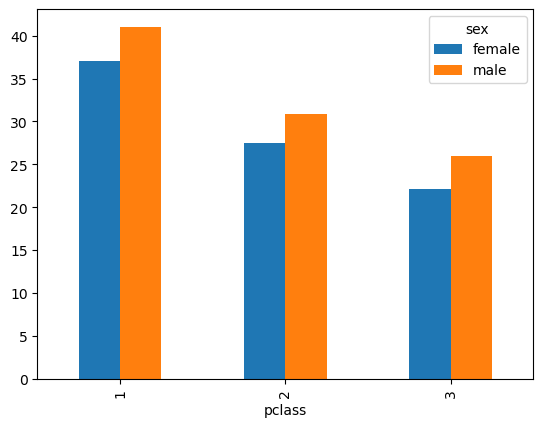

In [185]:
titanic.groupby(["pclass","sex"])["age"].mean().unstack().plot(kind="bar")

<Axes: xlabel='sex'>

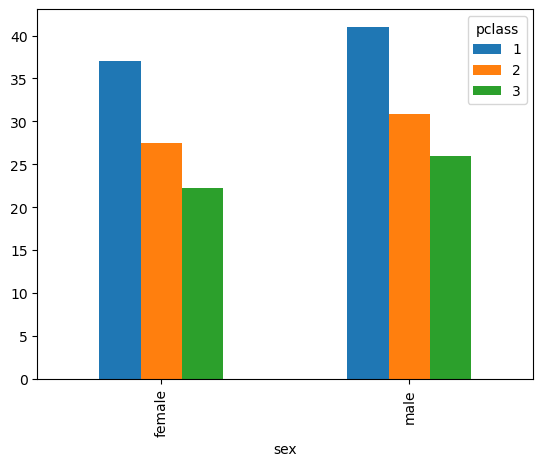

In [186]:
titanic.groupby(["pclass","sex"])["age"].mean().unstack(level="pclass").plot(kind="bar")

<Axes: xlabel='sex'>

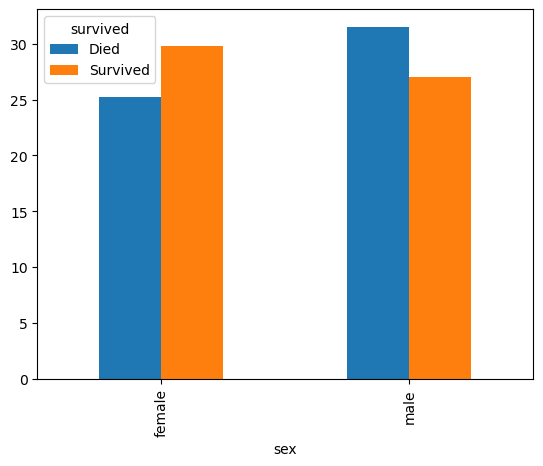

In [187]:
df2 = titanic.groupby(["sex","survived"])["age"].mean()
df2.unstack().rename(columns={0:"Died",1:"Survived"}).plot(kind="bar")

## Grouping by Index

In [190]:
p1

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [192]:
# Q. Find the sum of population in year 2000
p1.groupby(level=1).sum().head()

,population
year,
1990,499245628.0
1991,505961884.0
1992,513028462.0
1993,519837190.0
1994,526251652.0


In [195]:
# Q. Find minimum population by State
p1.groupby(level=0).min().head()

,population
state,
AK,553290.0
AL,4050055.0
AR,2356586.0
AZ,3684097.0
CA,29959515.0


In [196]:
# Q. Find minimum population of states by year
p1.groupby(level=[1,0]).min()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1272 rows x 1 columns]

We can also group by names of index

In [198]:
p1.groupby("year").min().head()

,population
year,
1990,453690.0
1991,459260.0
1992,466251.0
1993,473081.0
1994,480283.0


In [199]:
p1.groupby(["year","state"]).min()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1272 rows x 1 columns]